# Function Definition

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from keras import utils as np_utils

Using TensorFlow backend.


In [2]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

In [3]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [4]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [5]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [6]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

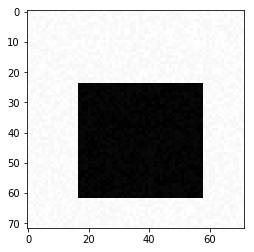

In [7]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

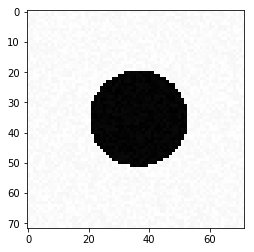

In [8]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

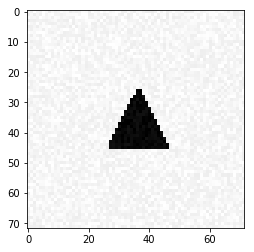

In [9]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [10]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


In [11]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [12]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [13]:
import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [14]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

# Regression Problem

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

In [16]:
#Generating data
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


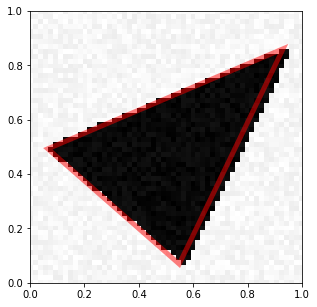

In [17]:
visualize_prediction(X_train[0], Y_train[0])

In [18]:
#Reformatting the input
X_train = X_train.reshape(X_train.shape[0],72,72,1)
X_test = X_test.reshape(X_test.shape[0],72,72,1)

## Normalize Y_train and Y_test

In [19]:
# first have a look on Y_train
print(Y_train.shape)
Y_train[0]

(300, 6)


array([0.54869339, 0.06919453, 0.93091027, 0.86096294, 0.06532782,
       0.49302709])

In [20]:
Y_train_round = np.round(Y_train,2)
Y_test_round = np.round(Y_test,2)

## Build and train the regressor

In [21]:
#create the classifier
model_reg = Sequential()

model_reg.add(Conv2D(16,5,5,activation = 'relu',input_shape=(72,72,1)))
model_reg.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_reg.add(Flatten())
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dense(6,activation='linear'))

D:\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", input_shape=(72, 72, 1...)`
  after removing the cwd from sys.path.


In [23]:
#define the optimizer and compile
model_reg.compile(optimizer='adam', loss='mean_squared_error' ,metrics=['accuracy'] )
model_reg.fit(X_train, Y_train_round, batch_size= 16 , epochs=20)

Epoch 1/20
300/300 [==============================] - 2s 6ms/step - loss: 0.8463 - acc: 0.1800
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0859 - acc: 0.1567
Epoch 3/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0726 - acc: 0.2100
Epoch 4/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0684 - acc: 0.2500
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0617 - acc: 0.3333
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0569 - acc: 0.3433
Epoch 7/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0513 - acc: 0.3833
Epoch 8/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0458 - acc: 0.4367
Epoch 9/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0413 - acc: 0.4867
Epoch 10/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0389 - acc: 0.5200
Epoch 11/20
300/300 [============================

In [24]:
#testing
model_reg.evaluate(X_test, Y_test_round)

300/300 [==============================] - 0s 1ms/step


[0.07651726524035136, 0.28000000019868215]